In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('./net.csv')
df

,time,status
0,1.706802e+09,on
1,1.706802e+09,on
2,1.706802e+09,on
3,1.706802e+09,on
4,1.706802e+09,off
...,...,...
27576,1.708626e+09,on
27577,1.708626e+09,on
27578,1.708626e+09,on
27579,1.708626e+09,on


In [14]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df['hours'] = df['time'].dt.hour
df['minutes'] = df['time'].dt.minute

# Encode the 'status' column
df['status'] = df['status'].map({'on': 1, 'off': 0})

In [15]:
df

,time,status,hours,minutes
0,2024-02-01 15:42:00,1,15.0,42.0
1,2024-02-01 15:43:05,1,15.0,43.0
2,2024-02-01 15:44:11,1,15.0,44.0
3,2024-02-01 15:45:01,1,15.0,45.0
4,2024-02-01 15:46:25,0,15.0,46.0
...,...,...,...,...
27576,2024-02-22 18:14:00,1,18.0,14.0
27577,2024-02-22 18:15:00,1,18.0,15.0
27578,2024-02-22 18:16:00,1,18.0,16.0
27579,2024-02-22 18:17:01,1,18.0,17.0


In [16]:
X = df[['hours', 'minutes']]
y = df['status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LinearRegression

print(type(X_train))

model = LinearRegression()
model.fit(X_train, y_train)

In [10]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Assuming you have trained a linear regression model named 'model'
y_pred_linear = model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f'Mean Squared Error for Linear Regression: {mse_linear}')

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_binary = (y_pred_linear > 0.5).astype(int)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy for Linear Regression: {accuracy_linear:.2%}')

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [11]:
# Example prediction
new_data = pd.DataFrame({'hours': [19], 'minutes': [30]})
prediction = model.predict(new_data)
print(f'Predicted Status: {prediction}')

AttributeError: 'LinearRegression' object has no attribute 'coef_'

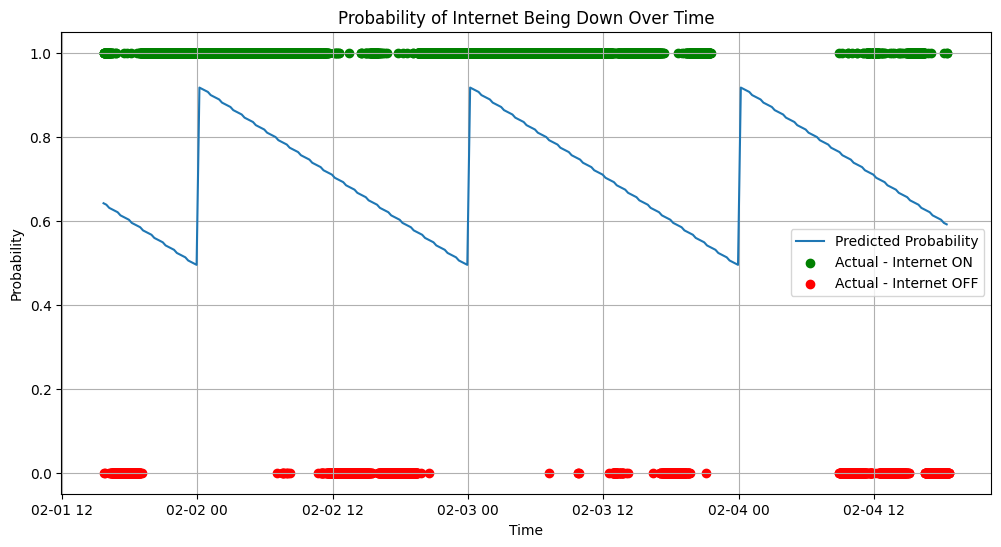

In [20]:
new_time = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='15min')
new_data = pd.DataFrame({'time': new_time, 'hours': new_time.hour, 'minutes': new_time.minute})

# Predict probabilities for the new data
new_data['probability'] = model.predict(new_data[['hours', 'minutes']])

# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(new_data['time'], new_data['probability'], label='Predicted Probability')
plt.scatter(df[df['status'] == 1]['time'], df[df['status'] == 1]['status'], color='green', label='Actual - Internet ON', marker='o')
plt.scatter(df[df['status'] == 0]['time'], df[df['status'] == 0]['status'], color='red', label='Actual - Internet OFF', marker='o')

plt.title('Probability of Internet Being Down Over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

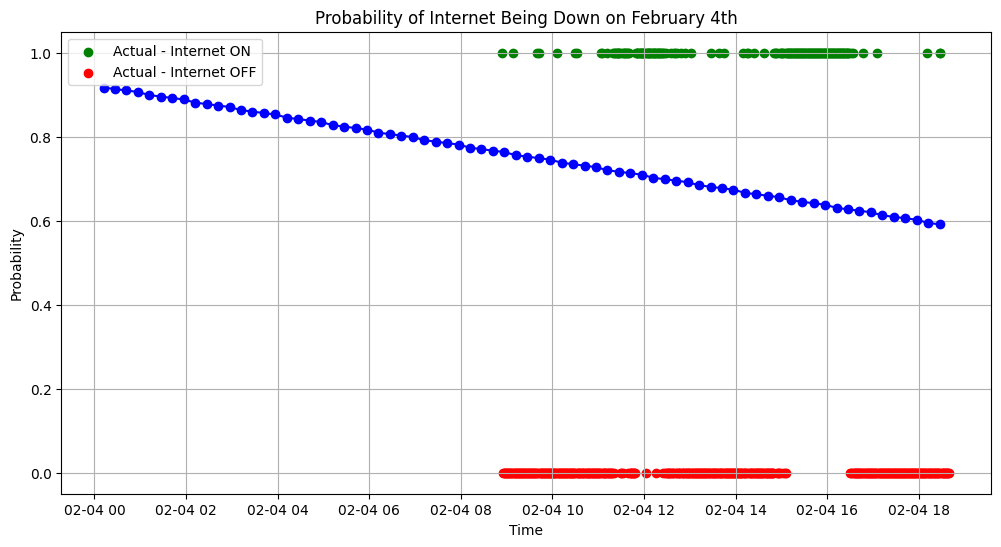

In [22]:
# Filter data for February 2nd
specific_day = new_data[new_data['time'].dt.date == pd.Timestamp('2024-02-04').date()]

# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(specific_day['time'], specific_day['probability'], marker='o', linestyle='-', color='blue')
plt.scatter(df[(df['time'].dt.date == pd.Timestamp('2024-02-04').date()) & (df['status'] == 1)]['time'],
            df[(df['time'].dt.date == pd.Timestamp('2024-02-04').date()) & (df['status'] == 1)]['status'],
            color='green', label='Actual - Internet ON', marker='o')
plt.scatter(df[(df['time'].dt.date == pd.Timestamp('2024-02-04').date()) & (df['status'] == 0)]['time'],
            df[(df['time'].dt.date == pd.Timestamp('2024-02-04').date()) & (df['status'] == 0)]['status'],
            color='red', label='Actual - Internet OFF', marker='o')

plt.title('Probability of Internet Being Down on February 4th')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Use the original data with status encoded as 0 (off) and 1 (on)
X = df[['hours', 'minutes']]
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.64
Confusion Matrix:
[[  0 221]
 [ 52 490]]
